1. Data Import

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler


In [176]:
df=pd.read_excel("Loan_Data/data_science_assessment_data.xlsx", sheet_name="Sheet1")

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_id                      1580 non-null   object        
 1   sector                       1580 non-null   object        
 2   industry_x                   1580 non-null   object        
 3   PRODUCT_GROUP_NAME           1580 non-null   object        
 4   LINE_DESC                    1580 non-null   object        
 5   FACILITY_TYPE                1580 non-null   object        
 6   Contract_Amount              1580 non-null   float64       
 7   CURR_BAL                     1574 non-null   float64       
 8   EQUIV_BALANCE                1574 non-null   float64       
 9   Contract_eff_date            1580 non-null   datetime64[ns]
 10  CONTRACT_MAT_DATE            1580 non-null   datetime64[ns]
 11  report_date                  1580 non-null 

remove duplicates using the loan id

In [178]:
duplicate_count = df.duplicated(subset="loan_id").sum()
duplicate_count

np.int64(633)

In [179]:

# Remove duplicates based on loan_id (keeping the first occurrence)
df = df.drop_duplicates(subset="loan_id", keep="first")

# Reset index
df.reset_index(drop=True, inplace=True)

In [180]:
df.head(3)

,loan_id,sector,industry_x,PRODUCT_GROUP_NAME,LINE_DESC,FACILITY_TYPE,Contract_Amount,CURR_BAL,EQUIV_BALANCE,Contract_eff_date,...,running_loans_count,running_loans_amount,previous_loan_default_count,date_of_birth,marital_status,employment_status,customer_inception_date,industry_y,industry_desc,sector_desc
0,AA1818056YFR,AGRICULTURE,Agro Services,Corporate Loans Group,BILLS DUE - TERM LOANS,TERM LOAN,625280.13,121776.05,121776.05,2018-06-29,...,0,0.0,1,1991-11-29,NaN,EMPLOYED,2019-11-01,4305,Agro Services,AGRICULTURE
1,AA17088XW27N,AGRICULTURE,Agro Services,Agricultural Loans Group,BILLS DUE - AGRIC LOANS,OTHER LOAN,18012.59,4.20,4.20,2017-03-29,...,0,0.0,2,NaT,NaN,NaN,2016-08-24,4305,Agro Services,AGRICULTURE
2,AA17094XPZ3W,AGRICULTURE,"Food Crops ,grains",Agricultural Loans Group,BILLS DUE - AGRIC LOANS,OTHER LOAN,5176227.76,1975372.41,1975372.41,2017-04-04,...,0,0.0,1,NaT,NaN,NaN,2016-06-23,4309,"Food Crops ,grains",AGRICULTURE


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_id                      947 non-null    object        
 1   sector                       947 non-null    object        
 2   industry_x                   947 non-null    object        
 3   PRODUCT_GROUP_NAME           947 non-null    object        
 4   LINE_DESC                    947 non-null    object        
 5   FACILITY_TYPE                947 non-null    object        
 6   Contract_Amount              947 non-null    float64       
 7   CURR_BAL                     941 non-null    float64       
 8   EQUIV_BALANCE                941 non-null    float64       
 9   Contract_eff_date            947 non-null    datetime64[ns]
 10  CONTRACT_MAT_DATE            947 non-null    datetime64[ns]
 11  report_date                  947 non-null    

In [182]:
df.describe()

,Contract_Amount,CURR_BAL,EQUIV_BALANCE,Contract_eff_date,CONTRACT_MAT_DATE,report_date,PayinAccount_Last_LOD_Date,MONTH_LOAN_DURATION,YEAR_LOAN_DURATION,DAYS_RUNNING_SINCE,...,DAYS_TO_MATURITY,Default_status,previous_loans_count,previous_loans_amount,running_loans_count,running_loans_amount,previous_loan_default_count,date_of_birth,customer_inception_date,industry_y
count,9.470000e+02,9.410000e+02,9.410000e+02,947,947,947,903,947.000000,947.000000,947.000000,...,947.000000,947.000000,947.000000,9.470000e+02,947.000000,9.470000e+02,947.000000,471,947,947.000000
mean,2.339226e+08,1.639635e+08,1.639635e+08,2021-12-30 18:33:04.371700224,2023-02-14 22:51:34.403379200,2023-02-08 18:48:16.726504960,2023-01-17 13:41:15.747507968,13.410771,1.105597,405.010560,...,6.168955,0.421331,3.677930,1.038506e+09,0.902851,4.370520e+08,1.637804,1990-09-17 15:32:29.044585984,2018-11-05 04:09:22.618796288,4340.140444
min,1.022630e+03,0.000000e+00,0.000000e+00,2016-04-14 00:00:00,2016-06-13 00:00:00,2018-04-30 00:00:00,2017-06-22 00:00:00,0.000000,0.000000,0.000000,...,-2206.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1952-01-29 00:00:00,2004-07-06 00:00:00,4202.000000
25%,1.760897e+06,3.700503e+05,3.700503e+05,2021-09-20 00:00:00,2022-11-09 12:00:00,2022-12-25 00:00:00,2022-12-02 00:00:00,3.000000,0.000000,89.000000,...,-25.000000,0.000000,1.000000,2.000000e+06,0.000000,0.000000e+00,0.000000,1981-02-07 12:00:00,2016-04-04 00:00:00,4305.000000
50%,5.069096e+06,2.694518e+06,2.694518e+06,2022-09-02 00:00:00,2023-04-30 00:00:00,2023-06-16 00:00:00,2023-05-03 00:00:00,9.000000,1.000000,184.000000,...,1.000000,0.000000,2.000000,1.024553e+07,1.000000,1.301662e+06,1.000000,1988-04-23 00:00:00,2019-08-02 00:00:00,4305.000000
75%,4.606877e+07,2.000000e+07,2.000000e+07,2023-03-03 00:00:00,2023-09-28 00:00:00,2023-08-23 00:00:00,2023-08-01 00:00:00,12.000000,1.000000,512.000000,...,61.000000,1.000000,5.000000,1.400000e+08,1.000000,1.000000e+07,2.000000,2001-04-18 00:00:00,2021-06-03 00:00:00,4309.000000
max,2.017653e+10,1.927179e+10,1.927179e+10,2023-08-23 00:00:00,2037-05-31 00:00:00,2023-08-23 00:00:00,2023-08-25 00:00:00,240.000000,20.000000,2675.000000,...,5030.000000,1.000000,34.000000,8.705381e+10,7.000000,4.035307e+10,15.000000,2021-11-09 00:00:00,2023-08-08 00:00:00,5309.000000
std,1.338048e+09,1.158902e+09,1.158902e+09,NaN,NaN,NaN,NaN,19.546475,1.660841,522.049411,...,458.581042,0.494033,4.272035,7.030401e+09,1.258822,2.707608e+09,2.231517,NaN,NaN,139.184002


2. Data Features and Prediction Outcome (Defualt_status vs Default_status_Kind)

  Data Features Summary:
  •	Loan info: (facility type, contract amount, duration, maturity, etc.)
  •	Repayment behavior: (arrears, balances, payments, active status, default outcome)
  •	Loan history: (previous/running loan counts, defaults)
  •	Customer info: (DOB, marital, employment, onboarding date)
  •	Industry/Sector info: (sector, industry, classifications)

  

In [183]:
df['Default_status_kind'].unique()

array(['LOST', 'Watchlist', 'Not default', 'Doubtful/Impaired',
       'Substandard/Remedial'], dtype=object)

In [184]:
df['Default_status'].unique()

array([1, 0])

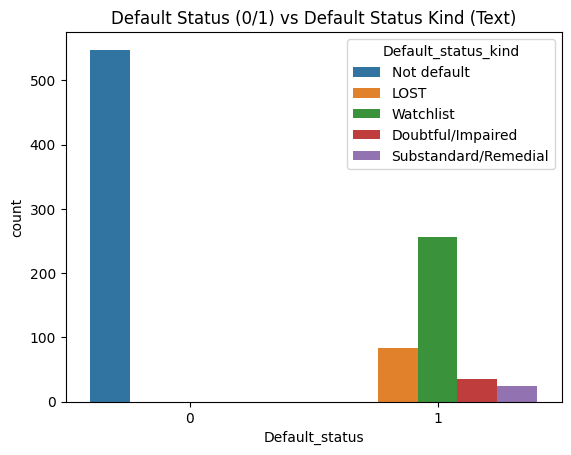

In [185]:
sns.countplot(x="Default_status", hue="Default_status_kind", data=df)
plt.title("Default Status (0/1) vs Default Status Kind (Text)")
plt.show()

In [186]:
df=df.drop(['Default_status_kind'], axis=1)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_id                      947 non-null    object        
 1   sector                       947 non-null    object        
 2   industry_x                   947 non-null    object        
 3   PRODUCT_GROUP_NAME           947 non-null    object        
 4   LINE_DESC                    947 non-null    object        
 5   FACILITY_TYPE                947 non-null    object        
 6   Contract_Amount              947 non-null    float64       
 7   CURR_BAL                     941 non-null    float64       
 8   EQUIV_BALANCE                941 non-null    float64       
 9   Contract_eff_date            947 non-null    datetime64[ns]
 10  CONTRACT_MAT_DATE            947 non-null    datetime64[ns]
 11  report_date                  947 non-null    

3. Missing Data and Data replacement

In [188]:
df.isnull().sum().sort_values(ascending=False)


marital_status                 917
employment_status              576
date_of_birth                  476
DIRECTORATENAME                109
DAY_SINCEPAYMENT                44
PayinAccount_Last_LOD_Date      44
INTEREST_RATE                   32
CURR_BAL                         6
EQUIV_BALANCE                    6
loan_id                          0
sector                           0
industry_x                       0
Contract_eff_date                0
FACILITY_TYPE                    0
report_date                      0
CONTRACT_MAT_DATE                0
Contract_Amount                  0
PRODUCT_GROUP_NAME               0
LINE_DESC                        0
DAYS_RUNNING_SINCE               0
YEAR_LOAN_DURATION               0
MONTH_LOAN_DURATION              0
ARR_STATUS                       0
previous_loans_count             0
DAYS_TO_MATURITY                 0
Is_Active_loans                  0
Default_status                   0
running_loans_amount             0
running_loans_count 

In [189]:
missing_percent = ((df.isnull().sum() / len(df))*100).sort_values(ascending=False)
missing_percent

marital_status                 96.832101
employment_status              60.823654
date_of_birth                  50.263992
DIRECTORATENAME                11.510032
DAY_SINCEPAYMENT                4.646251
PayinAccount_Last_LOD_Date      4.646251
INTEREST_RATE                   3.379092
CURR_BAL                        0.633580
EQUIV_BALANCE                   0.633580
loan_id                         0.000000
sector                          0.000000
industry_x                      0.000000
Contract_eff_date               0.000000
FACILITY_TYPE                   0.000000
report_date                     0.000000
CONTRACT_MAT_DATE               0.000000
Contract_Amount                 0.000000
PRODUCT_GROUP_NAME              0.000000
LINE_DESC                       0.000000
DAYS_RUNNING_SINCE              0.000000
YEAR_LOAN_DURATION              0.000000
MONTH_LOAN_DURATION             0.000000
ARR_STATUS                      0.000000
previous_loans_count            0.000000
DAYS_TO_MATURITY

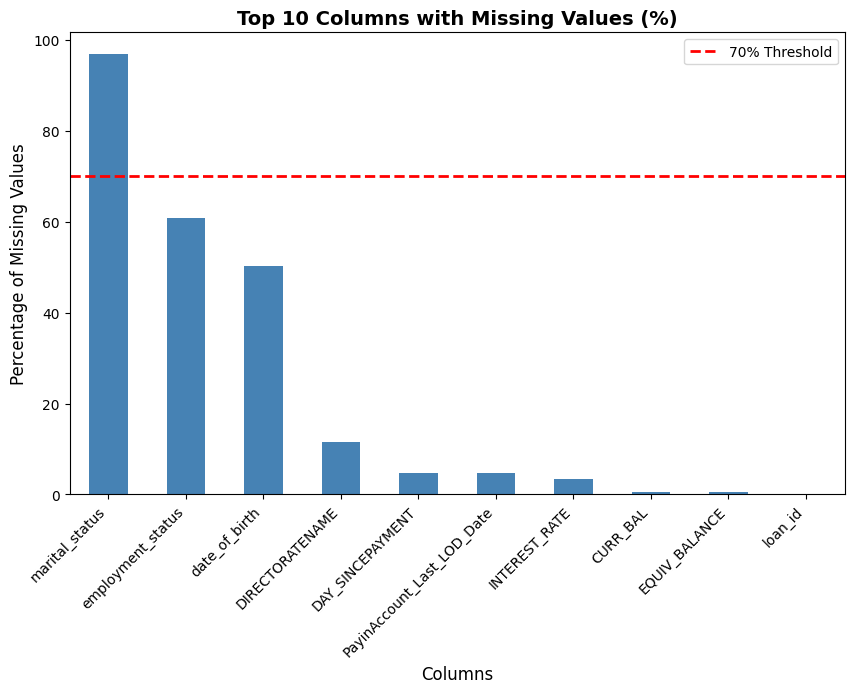

In [190]:
import matplotlib.pyplot as plt
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent_sorted = missing_percent.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = missing_percent_sorted.plot(kind="bar", color="steelblue")

plt.axhline(y=70, color="red", linestyle="--", linewidth=2, label="70% Threshold")
plt.title("Top 10 Columns with Missing Values (%)", fontsize=14, weight="bold")
plt.ylabel("Percentage of Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize=12)

plt.xticks(rotation=45, ha="right")


plt.legend()

plt.show()


Dropping of missing values and further exploration of missing values for replacement.



*   Dropped Feature: Marital Status
*   Other features to be explored excluding loan_id









In [191]:
df = df.drop(columns=["loan_id", "marital_status"])

In [192]:
missing_values=df[['employment_status','date_of_birth','DIRECTORATENAME','DAY_SINCEPAYMENT','PayinAccount_Last_LOD_Date','INTEREST_RATE','EQUIV_BALANCE','CURR_BAL']]

missing_values

,employment_status,date_of_birth,DIRECTORATENAME,DAY_SINCEPAYMENT,PayinAccount_Last_LOD_Date,INTEREST_RATE,EQUIV_BALANCE,CURR_BAL
0,EMPLOYED,1991-11-29,RETAIL & CONSUMER BANKING,1183.0,2020-02-07,0,1.217761e+05,1.217761e+05
1,NaN,NaT,NaN,703.0,2019-06-28,0,4.200000e+00,4.200000e+00
2,NaN,NaT,RETAIL & CONSUMER BANKING,1412.0,2017-07-19,0,1.975372e+06,1.975372e+06
3,NaN,NaT,RETAIL & CONSUMER BANKING,1426.0,2017-07-05,0,1.681325e+06,1.681325e+06
4,NaN,NaT,RETAIL & CONSUMER BANKING,1428.0,2017-07-03,0,1.560423e+06,1.560423e+06
...,...,...,...,...,...,...,...,...
942,NaN,1988-07-18,RETAIL & CONSUMER BANKING,1.0,2023-08-22,3.5,9.965684e+05,9.965684e+05
943,EMPLOYED,1974-02-02,RETAIL & CONSUMER BANKING,25.0,2023-06-02,9,2.452215e+06,2.452215e+06
944,EMPLOYED,1974-02-02,RETAIL & CONSUMER BANKING,54.0,2023-06-30,9,2.786393e+06,2.786393e+06
945,EMPLOYED,1975-11-07,RETAIL & CONSUMER BANKING,2.0,2023-08-21,42,9.745611e+06,9.745611e+06


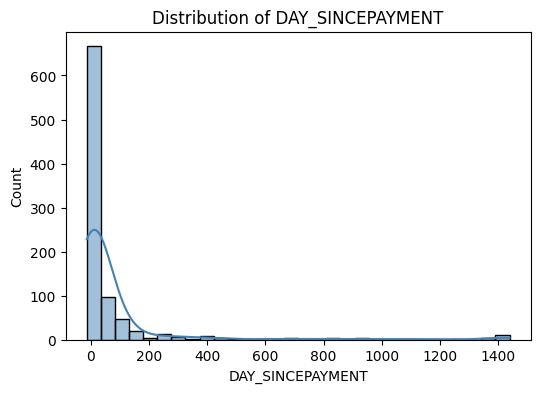

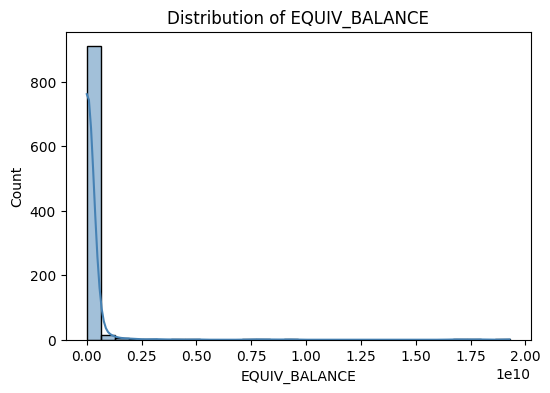

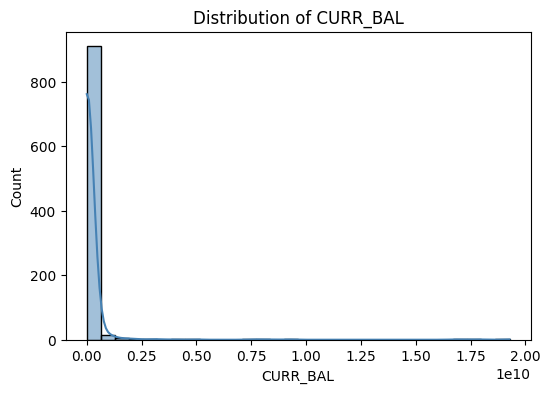

In [193]:
num_cols = missing_values.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.show()

In [194]:
missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   employment_status           371 non-null    object        
 1   date_of_birth               471 non-null    datetime64[ns]
 2   DIRECTORATENAME             838 non-null    object        
 3   DAY_SINCEPAYMENT            903 non-null    float64       
 4   PayinAccount_Last_LOD_Date  903 non-null    datetime64[ns]
 5   INTEREST_RATE               915 non-null    object        
 6   EQUIV_BALANCE               941 non-null    float64       
 7   CURR_BAL                    941 non-null    float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 59.3+ KB


In [195]:
missing_values['INTEREST_RATE'].value_counts()

INTEREST_RATE
9            282
28            75
0             64
30            45
26.5          45
18            40
24            34
23            33
29            26
3.5           20
21.55         20
22.5          19
22            18
21            18
40            15
29.5          12
19.5          10
20             9
21.5           9
25             9
20.5           9
27             8
5              7
26             7
27.5           6
25.5           6
7              6
20.05          5
10             5
19             5
18.5           4
8.75           4
42             4
38             4
46             4
34.5           3
23.05          3
23.5           2
24.5           2
8              2
33             2
41.5           2
33.5           2
32             1
29.5?41.5      1
13             1
38.5           1
43             1
44             1
16             1
10.5           1
31             1
34             1
Name: count, dtype: int64

In [196]:
df = df[df["INTEREST_RATE"] != '29.5?41.5']

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 946
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       946 non-null    object        
 1   industry_x                   946 non-null    object        
 2   PRODUCT_GROUP_NAME           946 non-null    object        
 3   LINE_DESC                    946 non-null    object        
 4   FACILITY_TYPE                946 non-null    object        
 5   Contract_Amount              946 non-null    float64       
 6   CURR_BAL                     940 non-null    float64       
 7   EQUIV_BALANCE                940 non-null    float64       
 8   Contract_eff_date            946 non-null    datetime64[ns]
 9   CONTRACT_MAT_DATE            946 non-null    datetime64[ns]
 10  report_date                  946 non-null    datetime64[ns]
 11  PayinAccount_Last_LOD_Date   902 non-null    datet

In [198]:
df["INTEREST_RATE"] = df["INTEREST_RATE"].astype(float)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 946
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       946 non-null    object        
 1   industry_x                   946 non-null    object        
 2   PRODUCT_GROUP_NAME           946 non-null    object        
 3   LINE_DESC                    946 non-null    object        
 4   FACILITY_TYPE                946 non-null    object        
 5   Contract_Amount              946 non-null    float64       
 6   CURR_BAL                     940 non-null    float64       
 7   EQUIV_BALANCE                940 non-null    float64       
 8   Contract_eff_date            946 non-null    datetime64[ns]
 9   CONTRACT_MAT_DATE            946 non-null    datetime64[ns]
 10  report_date                  946 non-null    datetime64[ns]
 11  PayinAccount_Last_LOD_Date   902 non-null    datet

In [200]:
missing_values=df[['employment_status','date_of_birth','DIRECTORATENAME','DAY_SINCEPAYMENT','PayinAccount_Last_LOD_Date','INTEREST_RATE','EQUIV_BALANCE','CURR_BAL']]

missing_values

,employment_status,date_of_birth,DIRECTORATENAME,DAY_SINCEPAYMENT,PayinAccount_Last_LOD_Date,INTEREST_RATE,EQUIV_BALANCE,CURR_BAL
0,EMPLOYED,1991-11-29,RETAIL & CONSUMER BANKING,1183.0,2020-02-07,0.0,1.217761e+05,1.217761e+05
1,NaN,NaT,NaN,703.0,2019-06-28,0.0,4.200000e+00,4.200000e+00
2,NaN,NaT,RETAIL & CONSUMER BANKING,1412.0,2017-07-19,0.0,1.975372e+06,1.975372e+06
3,NaN,NaT,RETAIL & CONSUMER BANKING,1426.0,2017-07-05,0.0,1.681325e+06,1.681325e+06
4,NaN,NaT,RETAIL & CONSUMER BANKING,1428.0,2017-07-03,0.0,1.560423e+06,1.560423e+06
...,...,...,...,...,...,...,...,...
942,NaN,1988-07-18,RETAIL & CONSUMER BANKING,1.0,2023-08-22,3.5,9.965684e+05,9.965684e+05
943,EMPLOYED,1974-02-02,RETAIL & CONSUMER BANKING,25.0,2023-06-02,9.0,2.452215e+06,2.452215e+06
944,EMPLOYED,1974-02-02,RETAIL & CONSUMER BANKING,54.0,2023-06-30,9.0,2.786393e+06,2.786393e+06
945,EMPLOYED,1975-11-07,RETAIL & CONSUMER BANKING,2.0,2023-08-21,42.0,9.745611e+06,9.745611e+06


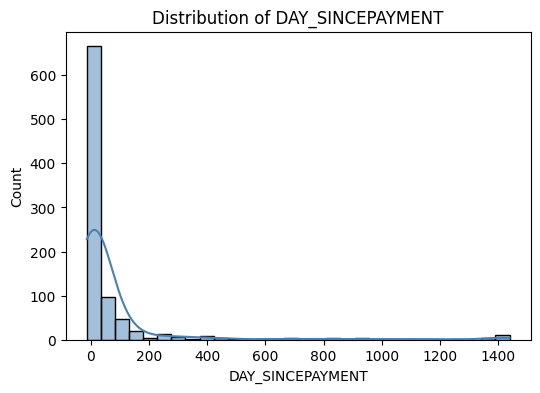

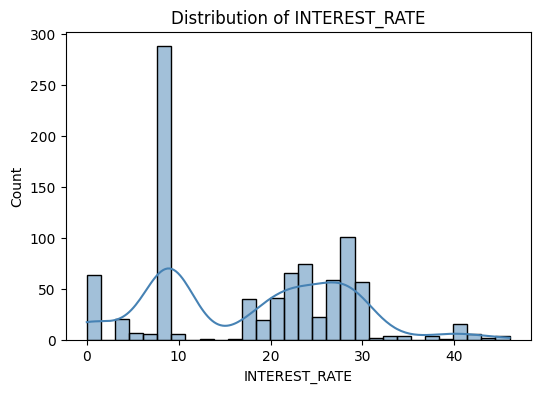

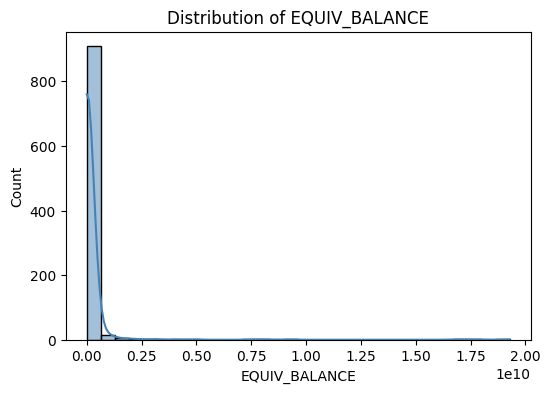

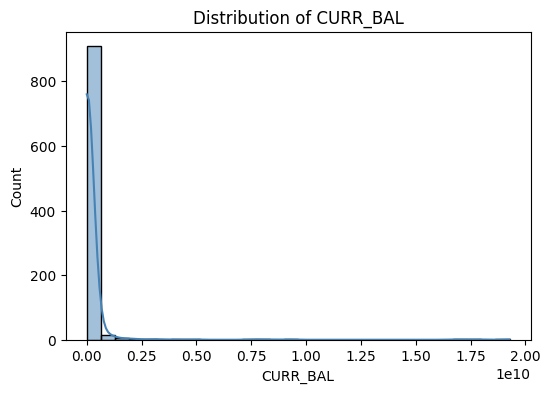

In [201]:
num_cols = missing_values.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.show()

There is need to confirm if the Interest Rate is correlated with the product group name,line description, facility type and contract amount based on the distribution. The question also remains are product group name, line description the same, then one should be dropped

In [202]:
df['PRODUCT_GROUP_NAME'].unique()

array(['Corporate Loans Group', 'Agricultural Loans Group',
       'Current Accounts Group', 'Retail Loans Individual Group',
       'Small Business Loans Group', 'HRM Loans Group'], dtype=object)

In [203]:
df['LINE_DESC'].unique()

array(['BILLS DUE - TERM LOANS', 'BILLS DUE - AGRIC LOANS',
       'CLASSIC CURRENT AC- CORP', 'MSME AGRIC FINANCE', 'SME LOANS',
       'CBN/BOI - PAIF LOANS', 'Export Finance Facility (EFF)',
       'BILLS DUE - RETAIL LOANS', 'KEY 360 - QUICK LOANS', 'STEP LOANS',
       'PERSONAL LOANS', 'STERLING PREMIER AC-CORP', 'SHORT TERM LOANS',
       'COMMODITY TRADE FINANCING', 'EX STAFF', 'OTHER DEBIT BALANCES',
       'AGRIC RSSF LOAN', 'EDUBANK PAY LOAN', 'CBN MSME DF LOANS',
       'MSME AGRIC FINANCE - WOMEN', 'CACS LOANS',
       'STERLING SUPA AC- INDIVIDUAL', 'BILLS DUE - LEASES',
       'BILLS DUE - STAFF LOANS', 'AGRIC TERM LOAN',
       'BILLS DUE - SPECIALISED LOANS', 'SUPA TERM LOANS',
       'NIRSAL LOANS - CORPORATE', 'SUPA EMERGING',
       'CLASSIC SUPA ACCOUNT', 'TERM LOAN FOR SCHOOLS', 'CAR LOANS',
       'CLASSIC CURR AC- INDIVIDUAL', 'STERLING PREMIUM AC-CORP',
       'AGRIC IFF LOANS', 'IMPORT FINANCE FACILITY (IFF)', 'NESF LOAN',
       'STOCK FINANCE FACILITY', 'TIM

In [204]:
line_map = df.groupby("PRODUCT_GROUP_NAME")["LINE_DESC"].unique().to_dict()
for product, lines in line_map.items():
    print(f"\n{product}:")
    for line in lines:
        print(f"  - {line}")


Agricultural Loans Group:
  - BILLS DUE - AGRIC LOANS
  - MSME AGRIC FINANCE
  - COMMODITY TRADE FINANCING
  - AGRIC RSSF LOAN
  - MSME AGRIC FINANCE - WOMEN
  - CACS LOANS
  - AGRIC TERM LOAN
  - NIRSAL LOANS - CORPORATE
  - AGRIC IFF LOANS
  - NESF LOAN

Corporate Loans Group:
  - BILLS DUE - TERM LOANS
  - SME LOANS
  - CBN/BOI - PAIF LOANS
  - Export Finance Facility (EFF)
  - BILLS DUE - RETAIL LOANS
  - SHORT TERM LOANS
  - BILLS DUE - LEASES
  - BILLS DUE - SPECIALISED LOANS
  - IMPORT FINANCE FACILITY (IFF)
  - STOCK FINANCE FACILITY
  - TIME LOANS
  - LEASE FINANCE FACILITY

Current Accounts Group:
  - CLASSIC CURRENT AC- CORP
  - STERLING PREMIER AC-CORP
  - OTHER DEBIT BALANCES
  - STERLING SUPA AC- INDIVIDUAL
  - SUPA EMERGING
  - CLASSIC SUPA ACCOUNT
  - CLASSIC CURR AC- INDIVIDUAL
  - STERLING PREMIUM AC-CORP

HRM Loans Group:
  - STEP LOANS
  - PERSONAL LOANS
  - EX STAFF
  - BILLS DUE - STAFF LOANS
  - CAR LOANS

Retail Loans Individual Group:
  - KEY 360 - QUICK LOANS

due to the classification, line desc can be dropped and product group name retained

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 946
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       946 non-null    object        
 1   industry_x                   946 non-null    object        
 2   PRODUCT_GROUP_NAME           946 non-null    object        
 3   LINE_DESC                    946 non-null    object        
 4   FACILITY_TYPE                946 non-null    object        
 5   Contract_Amount              946 non-null    float64       
 6   CURR_BAL                     940 non-null    float64       
 7   EQUIV_BALANCE                940 non-null    float64       
 8   Contract_eff_date            946 non-null    datetime64[ns]
 9   CONTRACT_MAT_DATE            946 non-null    datetime64[ns]
 10  report_date                  946 non-null    datetime64[ns]
 11  PayinAccount_Last_LOD_Date   902 non-null    datet

In [206]:
df=df.drop(columns='LINE_DESC', axis=1)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 946
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       946 non-null    object        
 1   industry_x                   946 non-null    object        
 2   PRODUCT_GROUP_NAME           946 non-null    object        
 3   FACILITY_TYPE                946 non-null    object        
 4   Contract_Amount              946 non-null    float64       
 5   CURR_BAL                     940 non-null    float64       
 6   EQUIV_BALANCE                940 non-null    float64       
 7   Contract_eff_date            946 non-null    datetime64[ns]
 8   CONTRACT_MAT_DATE            946 non-null    datetime64[ns]
 9   report_date                  946 non-null    datetime64[ns]
 10  PayinAccount_Last_LOD_Date   902 non-null    datetime64[ns]
 11  ARR_STATUS                   946 non-null    objec

In [208]:
df['FACILITY_TYPE'].unique()

array(['TERM LOAN', 'OTHER LOAN', 'OVERDRAFT', 'LEASE'], dtype=object)

📌 Correlation of Interest Rate with Contract Amount
                 INTEREST_RATE  Contract_Amount
INTEREST_RATE         1.000000        -0.085896
Contract_Amount      -0.085896         1.000000 



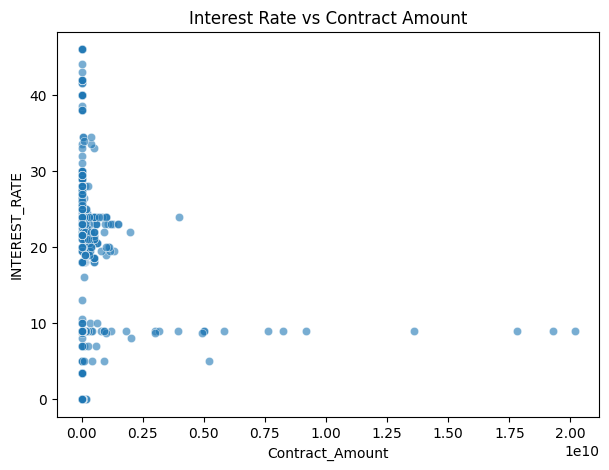

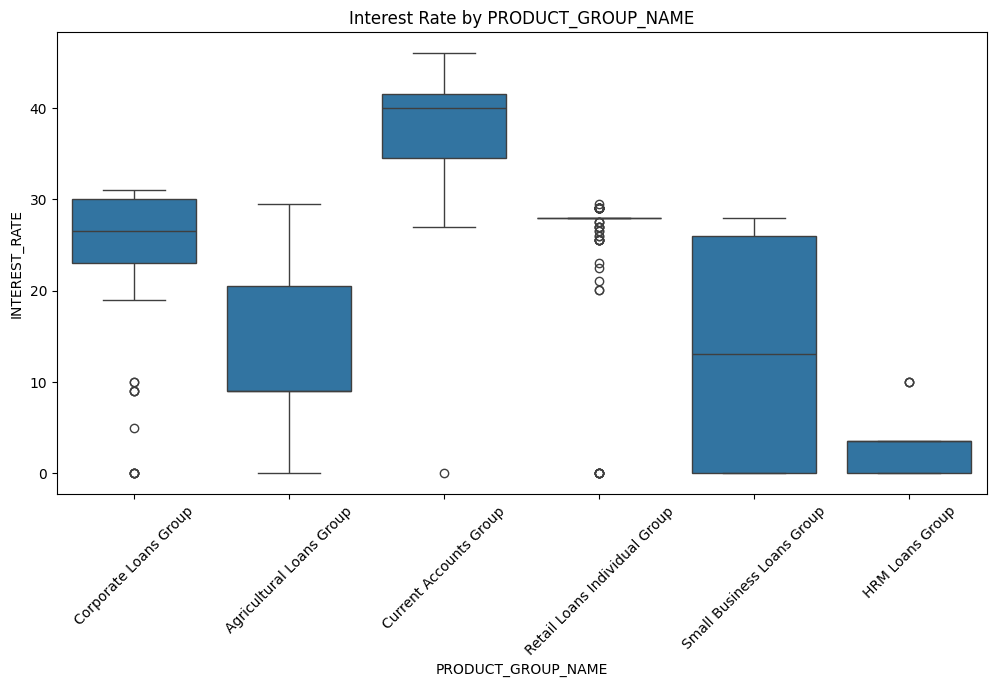

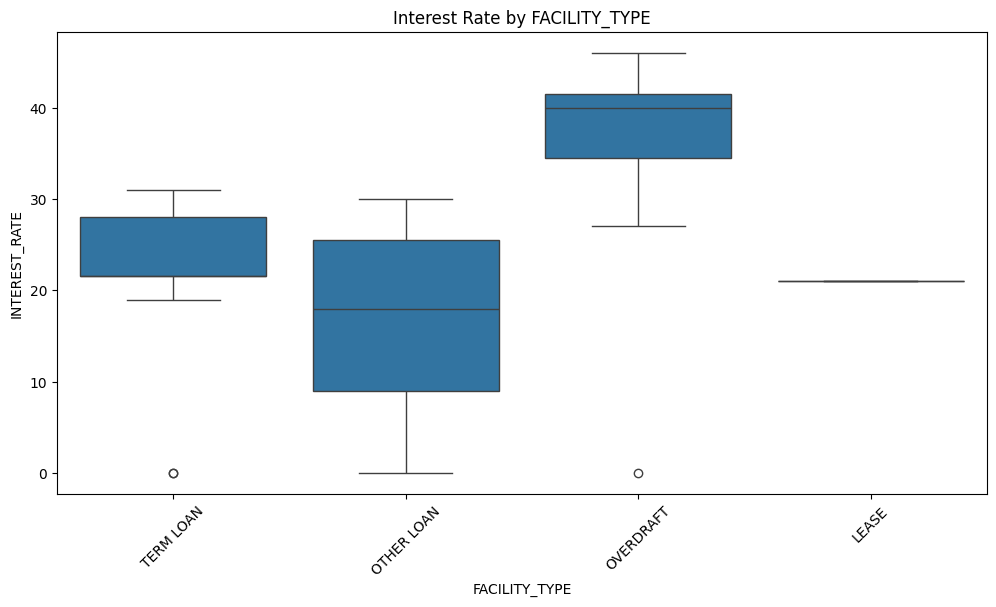

ANOVA for PRODUCT_GROUP_NAME vs INTEREST_RATE: p-value = 0.00000
 Significant difference detected between groups.

ANOVA for FACILITY_TYPE vs INTEREST_RATE: p-value = 0.00000
 Significant difference detected between groups.



In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# ========== 1. Correlation with CONTRACT_AMT (numeric) ==========
print("📌 Correlation of Interest Rate with Contract Amount")
corr = df[['INTEREST_RATE', 'Contract_Amount']].corr()
print(corr, "\n")

plt.figure(figsize=(7,5))
sns.scatterplot(x='Contract_Amount', y='INTEREST_RATE', data=df, alpha=0.6)
plt.title("Interest Rate vs Contract Amount")
plt.show()


# ========== 2. Boxplots for Categorical Features ==========
categorical_features = ["PRODUCT_GROUP_NAME", "FACILITY_TYPE"]

for col in categorical_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col, y='INTEREST_RATE', data=df)
    plt.xticks(rotation=45 if col != "LINE_DESC" else 90)
    plt.title(f"Interest Rate by {col}")
    plt.show()


# ========== 3. Statistical Tests ==========
def anova_test(df, cat_col, target="INTEREST_RATE"):

    groups = [group[target].dropna() for name, group in df.groupby(cat_col)]
    stat, pval = stats.f_oneway(*groups)
    print(f"ANOVA for {cat_col} vs {target}: p-value = {pval:.5f}")
    if pval < 0.05:
        print(" Significant difference detected between groups.\n")
    else:
        print(" No significant difference detected.\n")

for col in categorical_features:
    anova_test(df, col)

Based on the scatter plot and correlation, there is no known correlation between Interest rate and contract amount however comparing the boxplot for the Facility Type to the product group name, there is more distinction between the interest rate and minimal variability. For instance the "FACILITY_TYPE" categories (Term Loan, Other Loan, Overdraft, Lease) exhibit more distinct median interest rates and ranges compared to "PRODUCT_GROUP_NAME". Overdraft has a high median (35-40%), Lease is near 0%, Term Loan is 25-30%, and Other Loan is 15-20%. This separation allows for more precise imputation that better reflects the underlying differences in rates.

In [210]:
facility_type_medians = df.groupby("FACILITY_TYPE")["INTEREST_RATE"].median()

# Fill missing INTEREST_RATE values with the median of their respective FACILITY_TYPE
df["INTEREST_RATE"] = df.apply(
    lambda row: facility_type_medians[row["FACILITY_TYPE"]] if pd.isna(row["INTEREST_RATE"]) else row["INTEREST_RATE"],
    axis=1
)

In [211]:
df['INTEREST_RATE'].isnull().sum()

np.int64(0)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 946
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       946 non-null    object        
 1   industry_x                   946 non-null    object        
 2   PRODUCT_GROUP_NAME           946 non-null    object        
 3   FACILITY_TYPE                946 non-null    object        
 4   Contract_Amount              946 non-null    float64       
 5   CURR_BAL                     940 non-null    float64       
 6   EQUIV_BALANCE                940 non-null    float64       
 7   Contract_eff_date            946 non-null    datetime64[ns]
 8   CONTRACT_MAT_DATE            946 non-null    datetime64[ns]
 9   report_date                  946 non-null    datetime64[ns]
 10  PayinAccount_Last_LOD_Date   902 non-null    datetime64[ns]
 11  ARR_STATUS                   946 non-null    objec

The Cur_bal and equiv_bal and day since last payment to be filled with the median since both are schewed and the attendant bias would not impact on the the data

In [213]:
EQUIV_BALANCE_median = df["EQUIV_BALANCE"].median()
CURR_BAL_median = df["CURR_BAL"].median()
DAY_SINCEPAYMENT_median = df["DAY_SINCEPAYMENT"].median()

df["EQUIV_BALANCE"] = df["EQUIV_BALANCE"].fillna(EQUIV_BALANCE_median)
df["CURR_BAL"] = df["CURR_BAL"].fillna(CURR_BAL_median)
df["DAY_SINCEPAYMENT"] = df["DAY_SINCEPAYMENT"].fillna(DAY_SINCEPAYMENT_median)

In [214]:
df['EQUIV_BALANCE'].info()

<class 'pandas.core.series.Series'>
Index: 946 entries, 0 to 946
Series name: EQUIV_BALANCE
Non-Null Count  Dtype  
--------------  -----  
946 non-null    float64
dtypes: float64(1)
memory usage: 14.8 KB


In [215]:
df['CURR_BAL'].info()

<class 'pandas.core.series.Series'>
Index: 946 entries, 0 to 946
Series name: CURR_BAL
Non-Null Count  Dtype  
--------------  -----  
946 non-null    float64
dtypes: float64(1)
memory usage: 14.8 KB


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 946
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       946 non-null    object        
 1   industry_x                   946 non-null    object        
 2   PRODUCT_GROUP_NAME           946 non-null    object        
 3   FACILITY_TYPE                946 non-null    object        
 4   Contract_Amount              946 non-null    float64       
 5   CURR_BAL                     946 non-null    float64       
 6   EQUIV_BALANCE                946 non-null    float64       
 7   Contract_eff_date            946 non-null    datetime64[ns]
 8   CONTRACT_MAT_DATE            946 non-null    datetime64[ns]
 9   report_date                  946 non-null    datetime64[ns]
 10  PayinAccount_Last_LOD_Date   902 non-null    datetime64[ns]
 11  ARR_STATUS                   946 non-null    objec

Missing values for categorical data

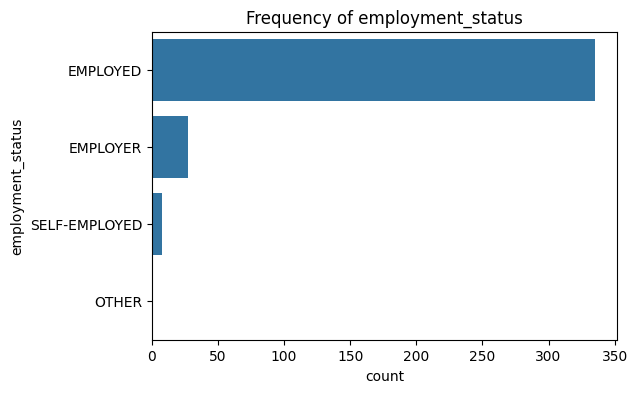

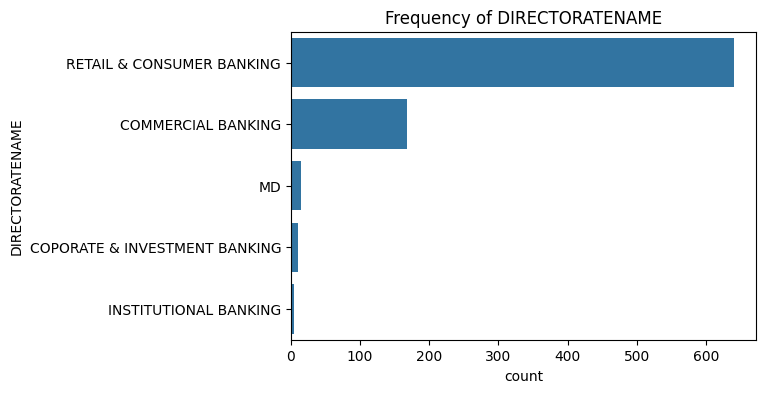

In [217]:
cat_cols = missing_values.select_dtypes(include=["object"]).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.show()

There is no known correlation between directorate name and other known features to fill in missing values, the directorate name cannot be discarded either, there is need to confirm if there are relationships between the defualt outcome and the directorate that handles the loan. The missing value will be captured as unknown whihc will be subsequently hotcoded

In [218]:
df["DIRECTORATENAME"] = df["DIRECTORATENAME"].fillna("Unknown")

In [219]:
contingency_table = pd.crosstab(df["DIRECTORATENAME"], df["Default_status"])

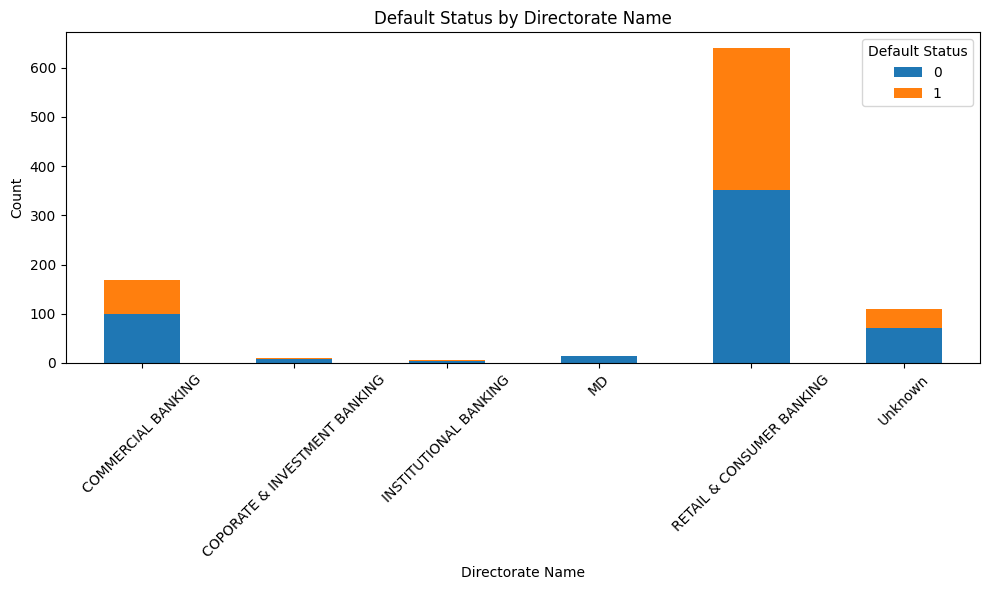

In [220]:
contingency_table.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Default Status by Directorate Name")
plt.xlabel("Directorate Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Default Status")
plt.tight_layout()
plt.show()

Further to check relationship between the direcorate name and the amount managed, to check for correlation

<Figure size 1000x600 with 0 Axes>

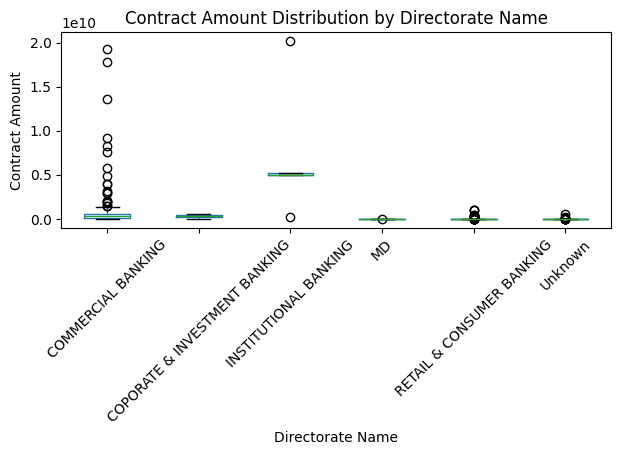

In [221]:
plt.figure(figsize=(10, 6))
df.boxplot(column="Contract_Amount", by="DIRECTORATENAME", grid=False)
plt.title("Contract Amount Distribution by Directorate Name")
plt.suptitle("")  # Remove the automatic subtitle
plt.xlabel("Directorate Name")
plt.ylabel("Contract Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [222]:
df["employment_status"] = df["employment_status"].fillna("Unknown")

<Figure size 1000x600 with 0 Axes>

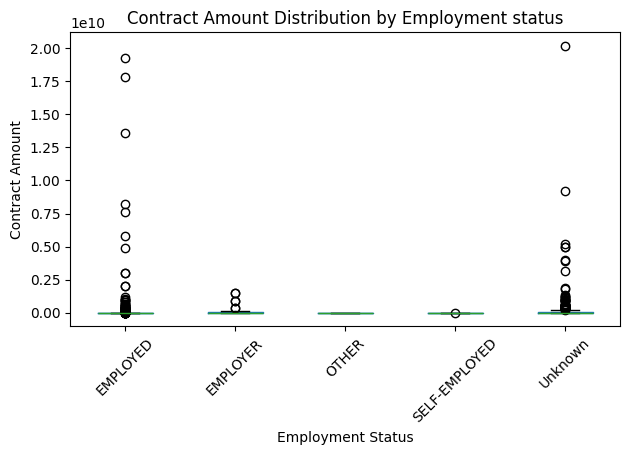

In [223]:
plt.figure(figsize=(10, 6))
df.boxplot(column="Contract_Amount", by="employment_status", grid=False)
plt.title("Contract Amount Distribution by Employment status")
plt.suptitle("")  # Remove the automatic subtitle
plt.xlabel("Employment Status")
plt.ylabel("Contract Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Date of birth is very important for feature engineering for the model prediction. What will be done is to calculate the age and check the distribution and correlation of the customers age with the defualt status, also carry out the data exploration with other features

In [224]:
df["Age_at_Inception"] = df.apply(
    lambda row: (row["customer_inception_date"] - row["date_of_birth"]).days // 365
    if pd.notnull(row["date_of_birth"]) else pd.NA,
    axis=1
).astype("Int64")

In [225]:
df['Age_at_Inception'].info()

<class 'pandas.core.series.Series'>
Index: 946 entries, 0 to 946
Series name: Age_at_Inception
Non-Null Count  Dtype
--------------  -----
471 non-null    Int64
dtypes: Int64(1)
memory usage: 15.7 KB


In [226]:
df['Age_at_Inception'].describe()

count        471.0
mean     26.498938
std      15.670663
min          -12.0
25%           16.0
50%           29.0
75%           36.0
max           68.0
Name: Age_at_Inception, dtype: Float64

In [227]:
df[['Age_at_Inception']].min()

Age_at_Inception    -12
dtype: Int64

In [228]:
last_20_min = df.nsmallest(40, "Age_at_Inception")

In [229]:
last_20_min[["date_of_birth", "customer_inception_date", "Age_at_Inception"]]

,date_of_birth,customer_inception_date,Age_at_Inception
910,2017-08-01,2005-11-30,-12
361,2021-11-09,2020-02-11,-2
241,2019-10-10,2019-03-19,-1
242,2019-10-10,2019-03-19,-1
272,2020-05-14,2019-05-31,-1
613,2021-11-03,2021-09-30,-1
614,2021-11-03,2021-09-30,-1
615,2021-11-03,2021-09-30,-1
616,2021-11-03,2021-09-30,-1
617,2021-11-03,2021-09-30,-1


There are no other information to within the data to justify customers having their age less than 0 or roughly low age, the age distribution will give more insight

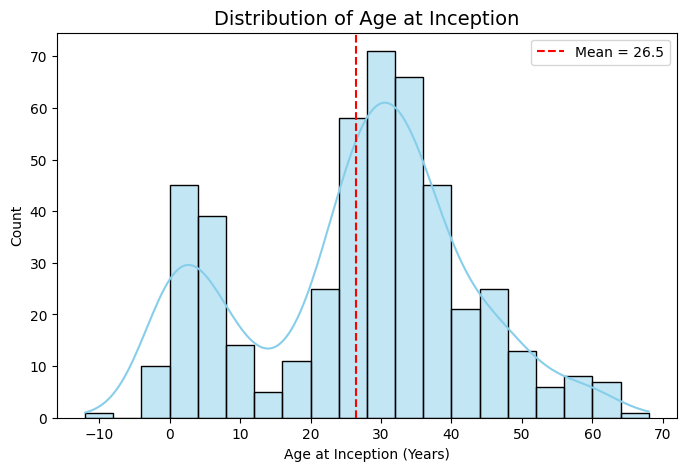

In [230]:
age_data = df["Age_at_Inception"].dropna()

plt.figure(figsize=(8,5))
sns.histplot(age_data, bins=20, kde=True, color="skyblue", edgecolor="black")

plt.title("Distribution of Age at Inception", fontsize=14)
plt.xlabel("Age at Inception (Years)")
plt.ylabel("Count")
plt.axvline(age_data.mean(), color="red", linestyle="--", label=f"Mean = {age_data.mean():.1f}")
plt.legend()
plt.show()

The legal age for securing loan is 18, there might be need to check the number of customers that fall within the category less than 18

In [231]:
under_18 = df[df["Age_at_Inception"] < 18]
num_under_18 = under_18.shape[0]
num_under_18

119

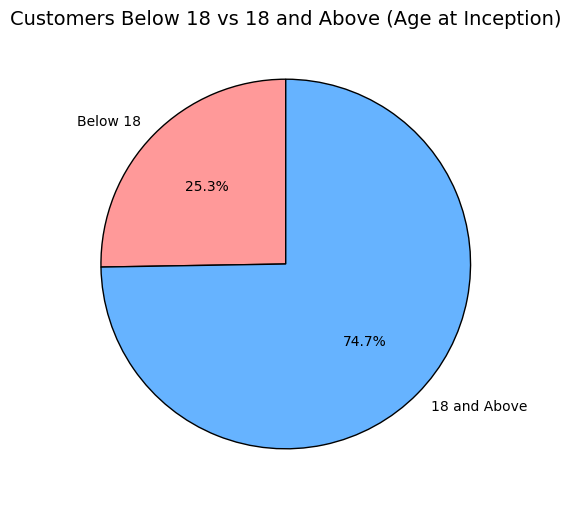

In [232]:
counts = {
    "Below 18": df[df["Age_at_Inception"] < 18].shape[0],
    "18 and Above": df[df["Age_at_Inception"] >= 18].shape[0]
}

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values(),
    labels=counts.keys(),
    autopct='%1.1f%%',
    colors=["#ff9999","#66b3ff"],
    startangle=90,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Customers Below 18 vs 18 and Above (Age at Inception)", fontsize=14)
plt.show()

There is need to exclude the age below 18 and rerun the distrution

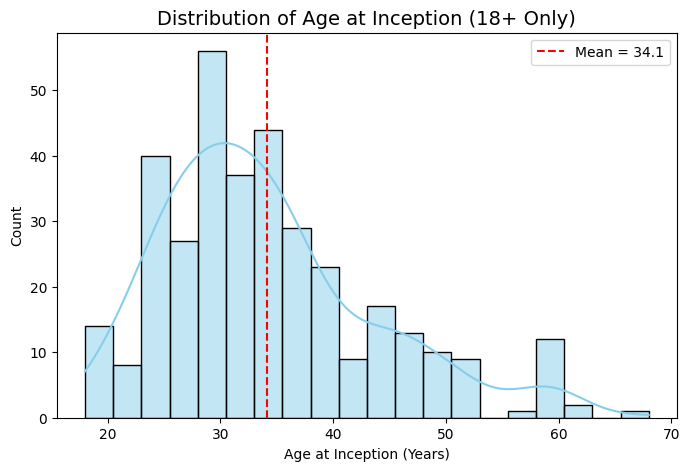

In [233]:
df_filtered = df[df["Age_at_Inception"] >= 18]

# Extract age column (without NaNs)
age_data = df_filtered["Age_at_Inception"].dropna()

# Plot histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(age_data, bins=20, kde=True, color="skyblue", edgecolor="black")

# Add title and labels
plt.title("Distribution of Age at Inception (18+ Only)", fontsize=14)
plt.xlabel("Age at Inception (Years)")
plt.ylabel("Count")

# Add mean line
plt.axvline(age_data.mean(), color="red", linestyle="--", label=f"Mean = {age_data.mean():.1f}")
plt.legend()

plt.show()

In [234]:
# Keep only customers aged 18+
age_data = df[df["Age_at_Inception"] >= 18]["Age_at_Inception"].dropna()

# Skewness
skewness = age_data.skew()
skewness

np.float64(0.9380989623419026)

In [235]:
age_data.describe()

count        352.0
mean     34.116477
std       9.522537
min           18.0
25%           27.0
50%           32.0
75%           38.0
max           68.0
Name: Age_at_Inception, dtype: Float64

Since age at inception above 18 is positively skewed, there are notable outliers in the data and so median age will be use to fill the missing values and the rows below 18 will be excluded from the data set

In [236]:
# Calculate median age from df_filtered (18+ only)
median_age_filtered = df[df["Age_at_Inception"] >= 18]["Age_at_Inception"].median()

# Fill missing Age_at_Inception with median
df["Age_at_Inception"].fillna(median_age_filtered, inplace=True)

/tmp/ipykernel_9163/2817775200.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age_at_Inception"].fillna(median_age_filtered, inplace=True)


In [237]:
df['Age_at_Inception'].info()

<class 'pandas.core.series.Series'>
Index: 946 entries, 0 to 946
Series name: Age_at_Inception
Non-Null Count  Dtype
--------------  -----
946 non-null    Int64
dtypes: Int64(1)
memory usage: 15.7 KB


In [238]:
df['Age_at_Inception'].describe()

count        946.0
mean     29.261099
std      11.388963
min          -12.0
25%           29.0
50%           32.0
75%           32.0
max           68.0
Name: Age_at_Inception, dtype: Float64

In [239]:
# Remove ages below 18
df = df[df["Age_at_Inception"] >= 18]

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       827 non-null    object        
 1   industry_x                   827 non-null    object        
 2   PRODUCT_GROUP_NAME           827 non-null    object        
 3   FACILITY_TYPE                827 non-null    object        
 4   Contract_Amount              827 non-null    float64       
 5   CURR_BAL                     827 non-null    float64       
 6   EQUIV_BALANCE                827 non-null    float64       
 7   Contract_eff_date            827 non-null    datetime64[ns]
 8   CONTRACT_MAT_DATE            827 non-null    datetime64[ns]
 9   report_date                  827 non-null    datetime64[ns]
 10  PayinAccount_Last_LOD_Date   794 non-null    datetime64[ns]
 11  ARR_STATUS                   827 non-null    

In [241]:
df.head(5)

,sector,industry_x,PRODUCT_GROUP_NAME,FACILITY_TYPE,Contract_Amount,CURR_BAL,EQUIV_BALANCE,Contract_eff_date,CONTRACT_MAT_DATE,report_date,...,running_loans_count,running_loans_amount,previous_loan_default_count,date_of_birth,employment_status,customer_inception_date,industry_y,industry_desc,sector_desc,Age_at_Inception
0,AGRICULTURE,Agro Services,Corporate Loans Group,TERM LOAN,625280.13,121776.05,121776.05,2018-06-29,2020-06-24,2023-05-05,...,0,0.0,1,1991-11-29,EMPLOYED,2019-11-01,4305,Agro Services,AGRICULTURE,27
1,AGRICULTURE,Agro Services,Agricultural Loans Group,OTHER LOAN,18012.59,4.20,4.20,2017-03-29,2017-08-26,2021-05-31,...,0,0.0,2,NaT,Unknown,2016-08-24,4305,Agro Services,AGRICULTURE,32
2,AGRICULTURE,"Food Crops ,grains",Agricultural Loans Group,OTHER LOAN,5176227.76,1975372.41,1975372.41,2017-04-04,2018-02-28,2021-05-31,...,0,0.0,1,NaT,Unknown,2016-06-23,4309,"Food Crops ,grains",AGRICULTURE,32
3,AGRICULTURE,"Food Crops ,grains",Agricultural Loans Group,OTHER LOAN,3293963.12,1681324.76,1681324.76,2017-03-28,2018-02-28,2021-05-31,...,0,0.0,1,NaT,Unknown,2016-06-27,4309,"Food Crops ,grains",AGRICULTURE,32
4,AGRICULTURE,"Food Crops ,grains",Agricultural Loans Group,OTHER LOAN,3529246.20,1560422.78,1560422.78,2017-03-29,2018-02-28,2021-05-31,...,0,0.0,1,NaT,Unknown,2016-06-29,4309,"Food Crops ,grains",AGRICULTURE,32


In [242]:

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Check for negative values
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"{col} has {neg_count} negative values")

DAY_SINCEPAYMENT has 160 negative values
DAYS_TO_MATURITY has 353 negative values


There is need to do the distribution of days sincepyament to check the distribution

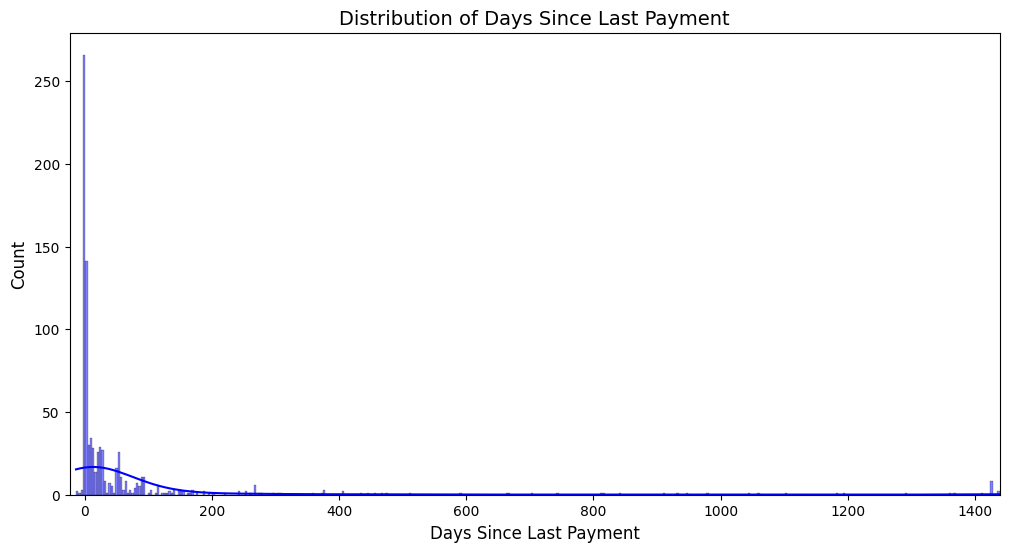

In [243]:
# Plot distribution with expanded coordinates
plt.figure(figsize=(12,6))  # wider plot for better visibility
sns.histplot(df["DAY_SINCEPAYMENT"].dropna(), bins=400, kde=True, color="blue")

plt.title("Distribution of Days Since Last Payment", fontsize=14)
plt.xlabel("Days Since Last Payment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Expand x-axis visibility (optional: adjust range to focus)
plt.xlim(df["DAY_SINCEPAYMENT"].min()-10, df["DAY_SINCEPAYMENT"].max())

plt.show()

In [244]:
df["calculated_DAYS_SINCE_PAYMENT"] = (df["report_date"] - df["PayinAccount_Last_LOD_Date"]).dt.days

In [245]:
df["Contract_Maturity_DAYS_SINCE_PAYMENT"] = (df["CONTRACT_MAT_DATE"] - df["report_date"]).dt.days

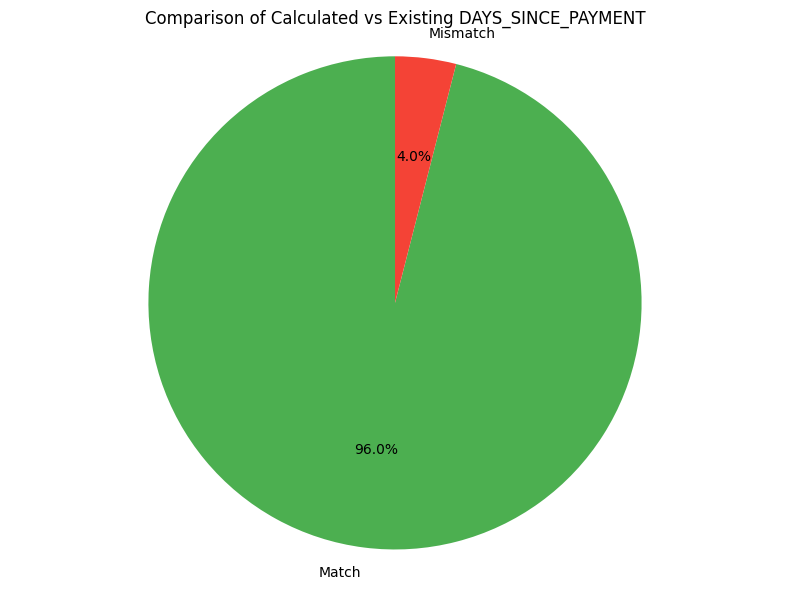

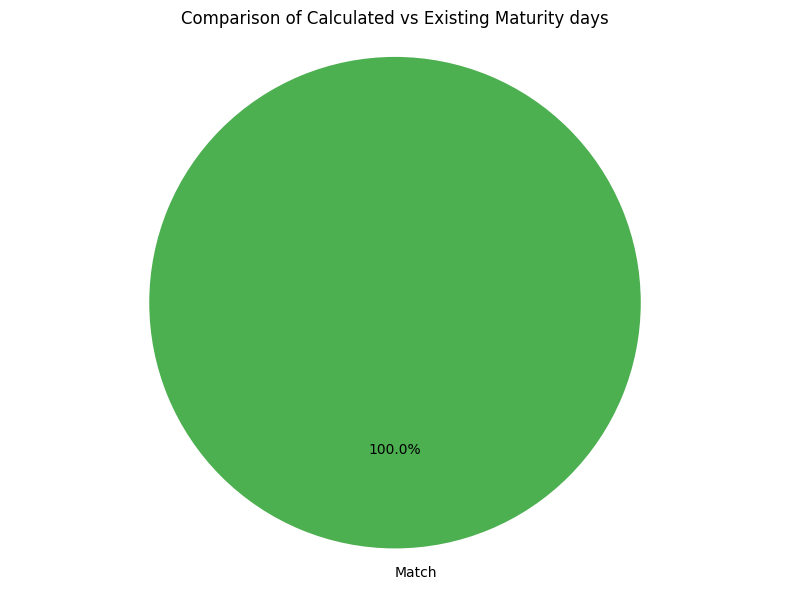

In [246]:
df["match"] = df["DAY_SINCEPAYMENT"] == df["calculated_DAYS_SINCE_PAYMENT"]

# Count matches and mismatches
comparison_counts = df["match"].value_counts()
labels = ["Match" if match else "Mismatch" for match in comparison_counts.index]
colors = ["#4CAF50" if match else "#F44336" for match in comparison_counts.index]  # Green for Match, Red for Mismatch

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(comparison_counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Comparison of Calculated vs Existing DAYS_SINCE_PAYMENT")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie
plt.tight_layout()
plt.show()

df["match2"] = df["Contract_Maturity_DAYS_SINCE_PAYMENT"] == df["DAYS_TO_MATURITY"]

# Count matches and mismatches
comparison_counts2 = df["match2"].value_counts()
labels2 = ["Match" if match else "Mismatch" for match in comparison_counts2.index]
colors2 = ["#4CAF50" if match else "#F44336" for match in comparison_counts2.index]  # Green for Match, Red for Mismatch

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(comparison_counts2, labels=labels2, colors=colors2, autopct="%1.1f%%", startangle=90)
plt.title("Comparison of Calculated vs Existing Maturity days")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie
plt.tight_layout()
plt.show()

In [247]:
df[df["match"] == False][["PayinAccount_Last_LOD_Date", "report_date"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 33 to 808
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PayinAccount_Last_LOD_Date  0 non-null      datetime64[ns]
 1   report_date                 33 non-null     datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 792.0 bytes


The outcome indicates the mismatch is as result of payinAccount last LOD Date not captured, the date sincepayment remains and the payin account last lod and report date including match gets dropped from df

In [248]:
df=df.drop(columns=["PayinAccount_Last_LOD_Date", "report_date",'EQUIV_BALANCE','match','industry_x','MONTH_LOAN_DURATION','date_of_birth','customer_inception_date','industry_y','industry_desc','sector_desc','CONTRACT_MAT_DATE','calculated_DAYS_SINCE_PAYMENT','Contract_Maturity_DAYS_SINCE_PAYMENT','match2'], axis=1)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sector                       827 non-null    object        
 1   PRODUCT_GROUP_NAME           827 non-null    object        
 2   FACILITY_TYPE                827 non-null    object        
 3   Contract_Amount              827 non-null    float64       
 4   CURR_BAL                     827 non-null    float64       
 5   Contract_eff_date            827 non-null    datetime64[ns]
 6   ARR_STATUS                   827 non-null    object        
 7   INTEREST_RATE                827 non-null    float64       
 8   YEAR_LOAN_DURATION           827 non-null    int64         
 9   DAYS_RUNNING_SINCE           827 non-null    int64         
 10  DAY_SINCEPAYMENT             827 non-null    float64       
 11  DAYS_TO_MATURITY             827 non-null    

In [250]:
# Define features and target
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns
target = "Default_status"

# Prepare data
X_numerical = df[numerical_features].drop(columns='Default_status')
X_categorical = df[categorical_features]
y = df[target]



In [251]:
X_numerical,X_categorical,y

(     Contract_Amount      CURR_BAL  INTEREST_RATE  YEAR_LOAN_DURATION  \
 0       6.252801e+05  1.217761e+05            0.0                   2   
 1       1.801259e+04  4.200000e+00            0.0                   0   
 2       5.176228e+06  1.975372e+06            0.0                   1   
 3       3.293963e+06  1.681325e+06            0.0                   1   
 4       3.529246e+06  1.560423e+06            0.0                   1   
 ..               ...           ...            ...                 ...   
 822     1.480000e+06  9.965684e+05            3.5                   2   
 823     2.452215e+06  2.452215e+06            9.0                   2   
 824     2.786393e+06  2.786393e+06            9.0                   0   
 825     1.000000e+07  9.745611e+06           42.0                   7   
 826     5.222775e+09  2.637027e+08            5.0                   5   
 
      DAYS_RUNNING_SINCE  DAY_SINCEPAYMENT  DAYS_TO_MATURITY  \
 0                  1771            1183.0    

In [252]:
# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop='first' to avoid multicollinearity
X_categorical_encoded = encoder.fit_transform(X_categorical)
feature_names_encoded = encoder.get_feature_names_out(categorical_features)


In [253]:
X_categorical_encoded_data=pd.DataFrame(X_categorical_encoded, columns=feature_names_encoded)

In [254]:
X_categorical_encoded_data.head(3).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   sector_AGRICULTURE                                3 non-null      float64
 1   sector_EDUCATION                                  3 non-null      float64
 2   sector_GENERAL                                    3 non-null      float64
 3   sector_GENERAL COMMERCE                           3 non-null      float64
 4   sector_VALUE CHAIN                                3 non-null      float64
 5   PRODUCT_GROUP_NAME_Corporate Loans Group          3 non-null      float64
 6   PRODUCT_GROUP_NAME_Current Accounts Group         3 non-null      float64
 7   PRODUCT_GROUP_NAME_HRM Loans Group                3 non-null      float64
 8   PRODUCT_GROUP_NAME_Retail Loans Individual Group  3 non-null      float64
 9   PRODUCT_GROUP_NAME_Small 

In [255]:
#Log Transformation for skewed monetary features (add 1 to handle zeros)
log_features = ["Contract_Amount", "CURR_BAL", "previous_loans_amount", "running_loans_amount"]
X_log = X_numerical[log_features].apply(lambda x: np.log1p(x))  # log(1 + x)



In [256]:
#Yeo-Johnson Transformation for features with negatives
yeo_johnson_features = ["DAYS_TO_MATURITY", "DAY_SINCEPAYMENT"]
pt = PowerTransformer(method="yeo-johnson")
X_yeo = pt.fit_transform(X_numerical[yeo_johnson_features])
X_yeo = pd.DataFrame(X_yeo, columns=yeo_johnson_features)

X_yeo.head(3)

,DAYS_TO_MATURITY,DAY_SINCEPAYMENT
0,-2.632332,2.796273
1,-3.490996,2.278890
2,-3.004955,2.989783


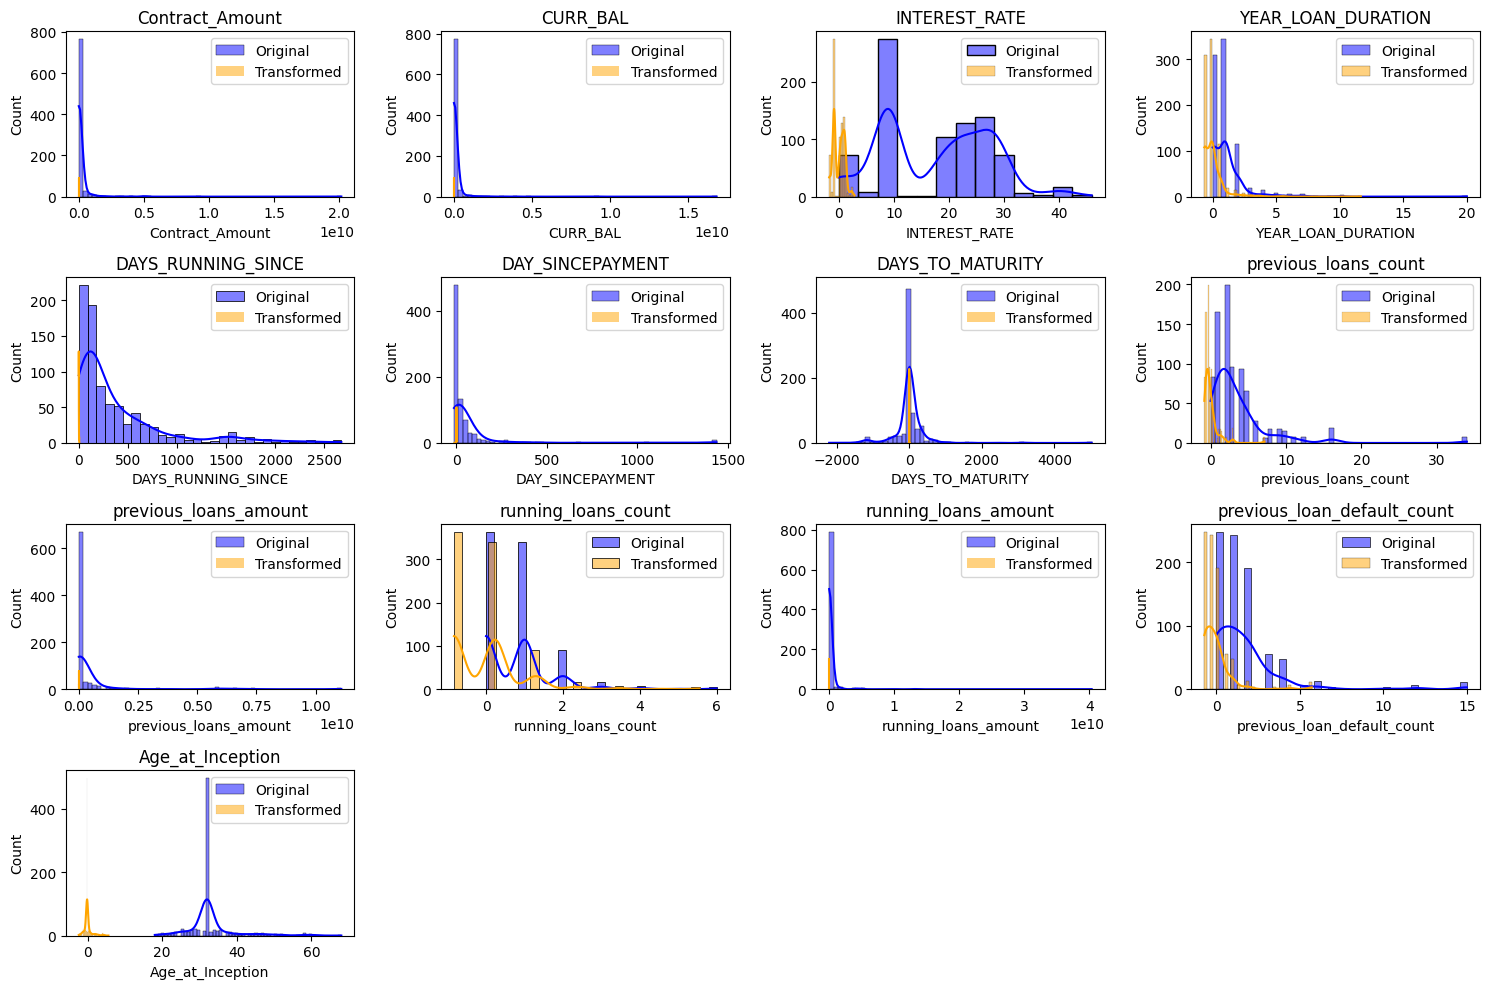

In [257]:
# Step 3: Combine transformed features with non-transformed ones
X_other = X_numerical.drop(columns=log_features + yeo_johnson_features)
X_transformed = pd.concat([X_log, X_yeo, X_other], axis=1)

# Step 4: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_scaled = pd.DataFrame(X_scaled, columns=X_transformed.columns)

# Visualize distributions before and after transformation
plt.figure(figsize=(15, 10))
# Iterate through the columns that are actually in X_numerical
for i, feature in enumerate(X_numerical.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X_numerical[feature], kde=True, color="blue", label="Original")
    sns.histplot(X_scaled[feature], kde=True, color="orange", label="Transformed")
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()

In [258]:

X_combined = pd.concat([X_categorical_encoded_data, X_scaled,y], axis=1)

# Save the concatenated DataFrame to a CSV file
X_combined.to_csv('Loan_Data/cleaned_and_normalized_data.csv', index=False)

